In [55]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'c:\Users\patri\Downloads\sim_parameters_historical_combined.csv')

def average_direction(degree_list):
    """Calculate the average direction in degrees"""
    sin_sum = sum(math.sin(math.radians(d)) for d in degree_list)
    cos_sum = sum(math.cos(math.radians(d)) for d in degree_list)
    sin_avg = sin_sum / len(degree_list)
    cos_avg = cos_sum / len(degree_list)
    avg_angle = math.degrees(math.atan2(sin_avg, cos_avg))
    return avg_angle % 360

def wind_vector_by_altitude(df, altitude):
    """Returns (avg_direction, avg_speed) for a given altitude"""
    direction_col = f'direction [{altitude}]'
    speed = str(altitude)

    avg_direction = average_direction(df[direction_col].tolist())
    avg_speed = df[speed].mean()

    return (avg_direction, avg_speed)

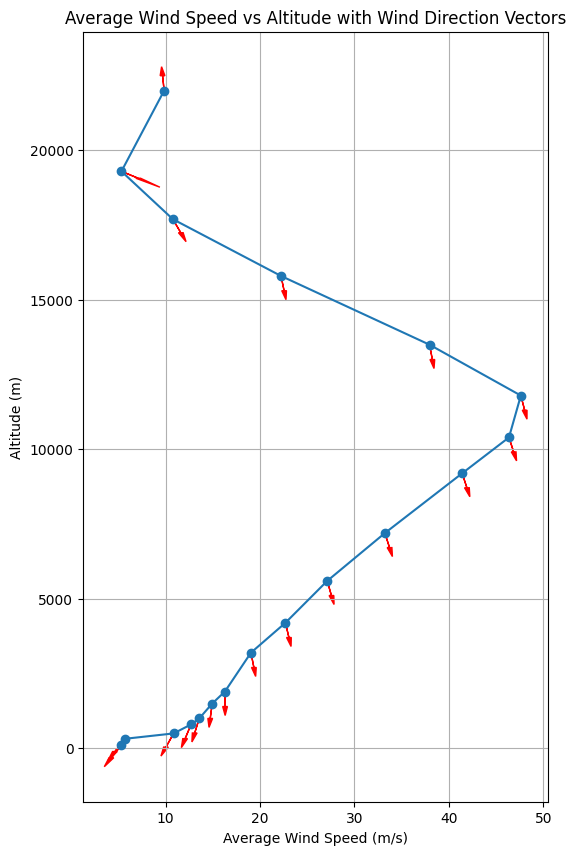

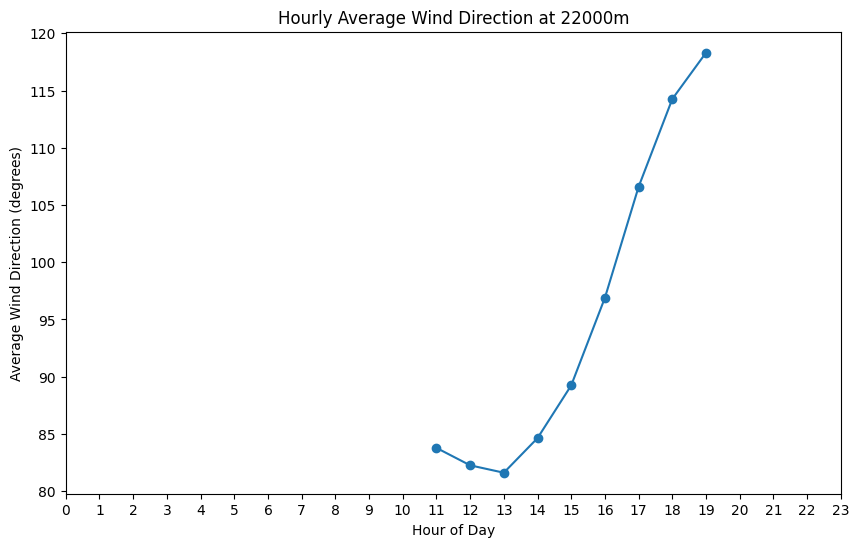

In [56]:
df['hour'] = pd.to_datetime(df['date'], format ='mixed').dt.hour
df['date_only'] = pd.to_datetime(df['date'], format ='mixed').dt.date
wind_speed_cols = [col for col in df.columns if 'stdev' not in col and 'direction' not in col and col not in ['date', 'temperature', 'pressure', 'hour', 'date_only']]
avg_wind_speeds = df[wind_speed_cols].mean()
altitudes = [int(col) for col in wind_speed_cols]

# Plot average wind speed vs altitude with direction vectors
plt.figure(figsize=(6,10))
plt.plot(avg_wind_speeds, altitudes, marker='o')
arrow_scale_x = 2
arrow_scale_y = 500

for i, alt in enumerate(altitudes):
    speed = avg_wind_speeds.iloc[i]
    direction, _ = wind_vector_by_altitude(df, alt)

    arrow_x = math.cos(math.radians(direction)) * arrow_scale_x
    arrow_y = math.sin(math.radians(direction)) * arrow_scale_y

    plt.arrow(speed, alt, arrow_x, arrow_y, head_width=0.5, head_length=300, fc='red', ec='red')

plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Altitude (m)')
plt.title('Average Wind Speed vs Altitude with Wind Direction Vectors')
plt.grid(True)
plt.show()

# Plot average wind direction at a specific altitude (e.g., 1000m) and time (e.g, 12:00)
altitude = 22000
direction_col = f'direction [{altitude}]'

avg_direction_by_hour = df.groupby('hour')[direction_col].apply(lambda dirs: average_direction(dirs.tolist()))

plt.figure(figsize=(10, 6))
plt.plot(avg_direction_by_hour.index, avg_direction_by_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Wind Direction (degrees)')
plt.title(f'Hourly Average Wind Direction at {altitude}m')
plt.xticks(range(0, 24))
plt.show()